<a href="https://colab.research.google.com/github/Kishorevasan2002/UBER_Ride_Analysis/blob/main/UBER_ride_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Load the file
path = 'https://gitlab.crio.do/me_notebook/me_jupyter_uberanalysis/-/raw/master/Uber_ride_analysis_dataset.csv'
df = pd.read_csv(path,header=0)
df.head()

,Request id,Pickup point,Drop point,Request timestamp,Start timestamp,Drop timestamp,Trip Cost,Extra Tip,Driver id,Trip Status,Ride Type,Payment Method,Weather
0,4386.0,Majestic Bus Station,Bangalore Palace,2021-07-13 0:00:24,NaN,NaN,0.00,0.0,61.0,Trip Cancelled,UberXL,NaN,Clear
1,4387.0,Lalbagh Botanical Garden,Indiranagar,2021-07-13 0:02:14,2021-07-13 0:16:00,2021-07-13 0:26:14,111.38,0.0,17.0,Trip Completed,UberGo,Cash,Cloudy
2,4388.0,Lalbagh Botanical Garden,Kormangala Police Station,2021-07-13 0:06:34,2021-07-13 0:14:01,2021-07-13 2:01:34,89.00,25.0,21.0,Trip Completed,UberXL,Card,Clear
3,4389.0,Majestic Bus Station,ISKCON Temple,2021-07-13 0:07:31,NaN,NaN,0.00,0.0,NaN,No Cars Available,UberXL,NaN,Rainy
4,4390.0,Bangalore City Railway Station,Lalbagh Botanical Garden,2021-07-13 0:07:58,2021-07-13 0:20:21,2021-07-13 0:40:58,307.40,25.0,35.0,Trip Completed,UberGo,Cash,Rainy


In [6]:
# Standardized column names
# Converted to lowercase and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['request_id', 'pickup_point', 'drop_point', 'request_timestamp',
       'start_timestamp', 'drop_timestamp', 'trip_cost', 'extra_tip',
       'driver_id', 'trip_status', 'ride_type', 'payment_method', 'weather'],
      dtype='object')

In [7]:
# Droped rows with missing trip status or trip cost
df = df.dropna(subset=['trip_status', 'trip_cost'])

In [8]:
# Filled missing payment method with mode
df['payment_method'].fillna(df['payment_method'].mode()[0])

,payment_method
0,Cash
1,Cash
2,Card
3,Cash
4,Cash
...,...
6740,Cash
6741,Card
6742,UPI
6743,UPI


In [9]:
#Filled missing driver ID with -1 (indicates unassigned)
df['driver_id'].fillna(-1)

,driver_id
0,61.0
1,17.0
2,21.0
3,-1.0
4,35.0
...,...
6740,55.0
6741,2.0
6742,13.0
6743,49.0


In [10]:
#  Handleed timestamps conditionally
# Droped rows where timestamps are missing only for 'Trip Completed'
df = df[~((df['trip_status'] == 'Trip Completed') & (df['start_timestamp'].isna() | df['drop_timestamp'].isna()))]

In [11]:
# Identifyed missing values in each column
print(df.isnull().sum())

request_id              0
pickup_point            0
drop_point              0
request_timestamp       0
start_timestamp      1650
drop_timestamp       1650
trip_cost               0
extra_tip               0
driver_id             775
trip_status             0
ride_type               0
payment_method       1650
weather                 0
dtype: int64


In [12]:
# Converted date columns to datetime
date_columns = ['request_timestamp', 'start_timestamp', 'drop_timestamp']
for col in date_columns:
    df[col] = pd.to_datetime(df[col])

In [13]:
#  Listed all numeric columns
numeric_columns = df.select_dtypes(include='number').columns.tolist()
print(numeric_columns)

['request_id', 'trip_cost', 'extra_tip', 'driver_id']


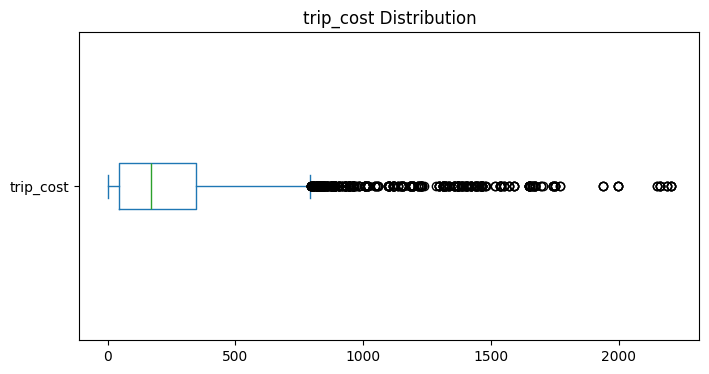

In [14]:
# Ploted boxplot for trip cost
plt.figure(figsize=(8, 4))
df['trip_cost'].plot(kind='box', vert=False)
plt.title('trip_cost Distribution')
plt.show()

In [15]:
# Detected and caped outliers in trip cost using IQR
Q1 = df['trip_cost'].quantile(0.25)
Q3 = df['trip_cost'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
df['trip_cost'] = np.where(df['trip_cost'] > upper_bound, upper_bound, df['trip_cost'])

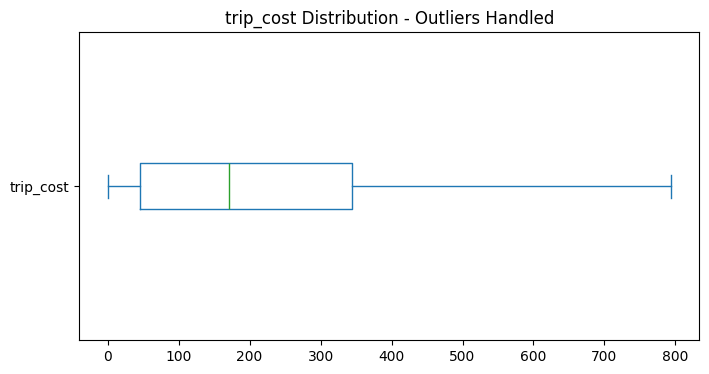

In [16]:
# Ploted boxplot for trip cost
plt.figure(figsize=(8, 4))
df['trip_cost'].plot(kind='box', vert=False)
plt.title('trip_cost Distribution - Outliers Handled')
plt.show()

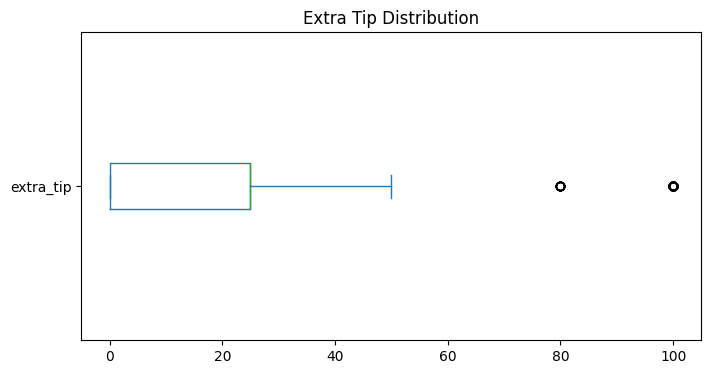

In [17]:
plt.figure(figsize=(8, 4))
df['extra_tip'].plot(kind='box', vert=False)
plt.title('Extra Tip Distribution')
plt.show()

# 📊 Exploratory Data Analysis (EDA)


In [18]:
# Understanding the shape of the dataset
df.shape

(6745, 13)

In [19]:
# Understanding the datatypes of the columns
df.dtypes

,0
request_id,float64
pickup_point,object
drop_point,object
request_timestamp,datetime64[ns]
start_timestamp,datetime64[ns]
drop_timestamp,datetime64[ns]
trip_cost,float64
extra_tip,float64
driver_id,float64
trip_status,object


## 2. Trip Status Breakdown


Text(0.5, 1.0, 'Trip Status Distribution')

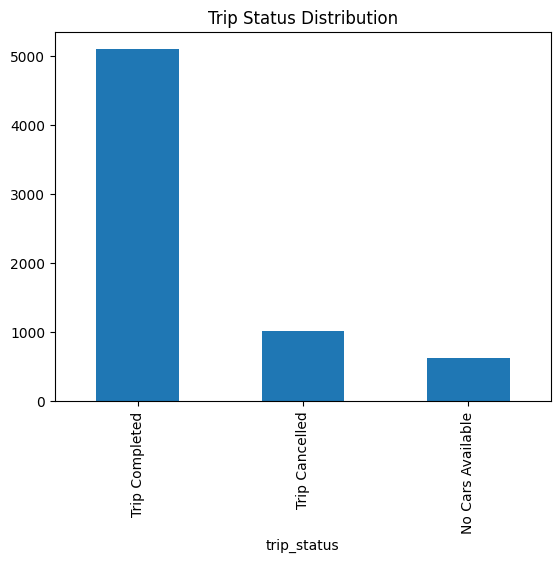

In [20]:
# Ploted the value_counts for different trip statuses
df['trip_status'].value_counts().plot(kind='bar')
plt.title("Trip Status Distribution")

## 3. Trip Cost Distribution


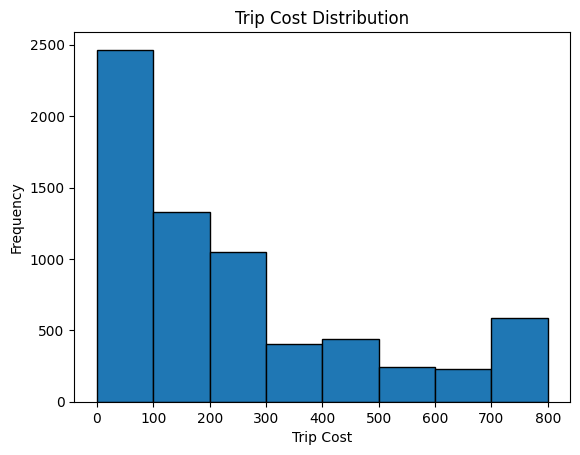

In [21]:
# Ploted Trip Cost Distribution
import numpy as np
import matplotlib.pyplot as plt

max_cost = df['trip_cost'].max()
bins = np.arange(0, max_cost + 100, 100)

df['trip_cost'].hist(bins=bins, edgecolor='black')
plt.title("Trip Cost Distribution")
plt.xlabel("Trip Cost")
plt.ylabel("Frequency")
plt.grid(False)
plt.show()

## 4. Analyze Payment Methods

In [22]:
# Analyzeed trip costs across payment methods by calculating the average, median, and number of trips for each method,
# and sorted the results to highlight the most expensive payment types on average

df.groupby('payment_method')['trip_cost'].agg(['mean', 'median', 'count']).sort_values(by='mean', ascending=False)

,mean,median,count
payment_method,,,
Card,316.517799,231.50,1708
UPI,315.056717,233.75,1663
Cash,307.026265,224.63,1724


## 5. Trip Duration Analysis


In [23]:
# Computeed the trip duration in minutes by taking the difference between drop and start timestamps
df['trip_duration_minutes'] = (df['drop_timestamp'] - df['start_timestamp']).dt.total_seconds() / 60

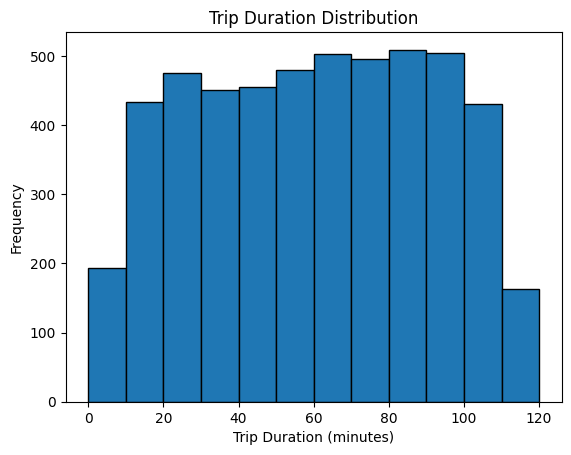

In [24]:
# Ploted distribution of trip duration
import numpy as np
import matplotlib.pyplot as plt

max_duration = df['trip_duration_minutes'].max()
bins = np.arange(0, max_duration + 10, 10)  # bins of size 10 minutes

# Plot histogram
df['trip_duration_minutes'].hist(bins=bins, edgecolor='black')
plt.title("Trip Duration Distribution")
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Frequency")
plt.grid(False)
plt.show()

# Transforming Data

## 1. Total Trip Cost

In [25]:
# Calculated Total cost of the trip

df['total_cost'] = df['trip_cost'] + df['extra_tip']

## 2. DateTime Columns


In [26]:
# Converted Time Columns to DateTime Format

df['request_timestamp'] = pd.to_datetime(df['request_timestamp'])
df['start_timestamp'] = pd.to_datetime(df['start_timestamp'])
df['drop_timestamp'] = pd.to_datetime(df['drop_timestamp'])

## 3. Extract Date Time


In [27]:
# Extracted Date and Time Components
'''
From the relevant datetime column(s), extract:
1. Date (YYYY-MM-DD) (request_date, start_date, drop_date)
2. Day of the week (e.g., Monday, Tuesday) (request_day, start_day, drop_day)
3. Exact time (HH:MM:SS) (request_time, start_time, drop_time)
4. Hour of the day (0–23) (request_hour, start_hour, drop_hour)
'''

df['request_date'] = df['request_timestamp'].dt.date
df['start_date'] = df['start_timestamp'].dt.date
df['drop_date'] = df['drop_timestamp'].dt.date

df['request_day'] = df['request_timestamp'].dt.day_name()
df['start_day'] = df['start_timestamp'].dt.day_name()
df['drop_day'] = df['drop_timestamp'].dt.day_name()

df['request_time'] = df['request_timestamp'].dt.time
df['start_time'] = df['start_timestamp'].dt.time
df['drop_time'] = df['drop_timestamp'].dt.time

df['request_hour'] = df['request_timestamp'].dt.hour
df['start_hour'] = df['start_timestamp'].dt.hour
df['drop_hour'] = df['drop_timestamp'].dt.hour

## 4. Ride Delay

In [28]:
# Calculating the Ride delay.
'''
- Determine the delay between the ride request and actual trip start.
- Added a column ride_delay reflecting this delay in hour value.
'''

df["ride_delay"] = ((df["drop_timestamp"] - df["start_timestamp"]).dt.total_seconds() / 3600).round(2)

## 5. Cancellation Reasons

In [29]:
# Determine Cancellation reasons
# - Assigned a cancellation reason to each trip based on the driver_id and trip_status columns using nested np.where() statements.
'''
1. If the driver_id is -1 and the trip status is 'No Cars Available', it indicates that no cab was assigned,
so the cancellation reason is set to 'No Cabs'.
2. If the driver_id is -1 and the trip status is 'Trip Cancelled', it means the passenger canceled the trip before a driver was assigned,
so the reason is 'Passenger'.
3. If a driver was assigned (driver_id not equal to -1) and the trip status is 'Trip Cancelled', it indicates that the driver canceled the trip,
so the reason is 'Driver'.
4. For all other cases—where the trip was completed successfully—the cancellation reason is set to 'Trip Completed'.

'''

df['cancellation_reason'] = np.where(
    (df['driver_id'] == -1) & (df['trip_status'] == 'No Cars Available'), 'No Cabs',
    np.where(
        (df['driver_id'] == -1) & (df['trip_status'] == 'Trip Cancelled'), 'Passenger',
        np.where(
            (df['driver_id'] != -1) & (df['trip_status'] == 'Trip Cancelled'), 'Driver',
            'Trip Completed'
        )
    )
)

# Analysis

In [30]:
# Creating a New Dataframe selecting columns relevant to our analysis
# All analysis going forward will be done on this new dataframe created

new_df = df[['request_id', 'driver_id', 'trip_status', 'request_day', 'request_hour','start_day', 'start_hour', 'drop_day', 'drop_hour', 'trip_cost',
            'ride_delay', 'weather', 'cancellation_reason']]

new_df.columns

Index(['request_id', 'driver_id', 'trip_status', 'request_day', 'request_hour',
       'start_day', 'start_hour', 'drop_day', 'drop_hour', 'trip_cost',
       'ride_delay', 'weather', 'cancellation_reason'],
      dtype='object')

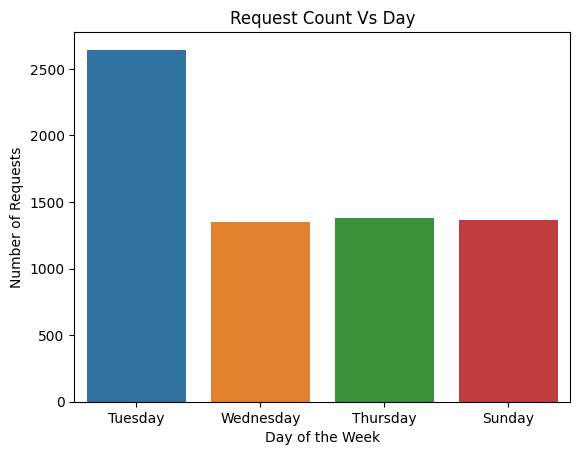

In [31]:
# Createed a bar chart / Count plot (using Seaborn) that shows the number of ride requests for each day of the week (request_day column)
'''
1. Import Seaborn library as sns
2. Use .countlot() to create the chart
3. Assign Title to the chart
    - Title should be → “Request Count Vs Day”
4. Assign X & Y labels
5. (Optional) Assign Figure Size
    - Try (12, 5) or (10, 6)
6. (Optional) Assign a colour Palette to the chart
    - Try 'Set1' or 'Pastel1' or 'coolwarm' or ‘Blues’, etc.
'''
import seaborn as sns

# plt.figure(figsize = (10, 6))

sns.countplot(
    new_df,
    x='request_day',
    hue='request_day',  # This applies palette correctly
    # palette='BuGn',  # Try 'Set1', 'Pastel1', 'husl', 'coolwarm', etc.
    legend=False
)

plt.title("Request Count Vs Day")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Requests")
plt.show()

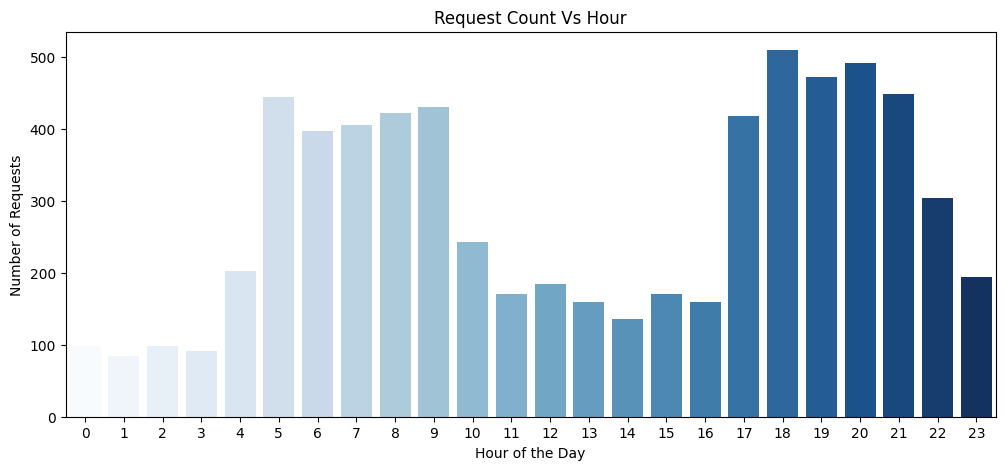

In [32]:
# Createed a bar chart / Count plot (using Seaborn) that shows the number of ride requests for each day of the week (request_day column)
plt.figure(figsize = (12, 5))

sns.countplot(
    new_df,
    x='request_hour',
    hue='request_hour',  # This applies palette correctly
    palette='Blues',  # Try 'Set1', 'Pastel1', 'husl', 'coolwarm', etc.
    legend=False
)

plt.title("Request Count Vs Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Requests")
plt.show()

In [33]:
# Calculateed the trip status bifurcation (normalize to percentage)
trip_status_rates = new_df['trip_status'].value_counts(normalize=True) * 100
print(trip_status_rates)

trip_status
Trip Completed       75.537435
Trip Cancelled       15.151964
No Cars Available     9.310600
Name: proportion, dtype: float64


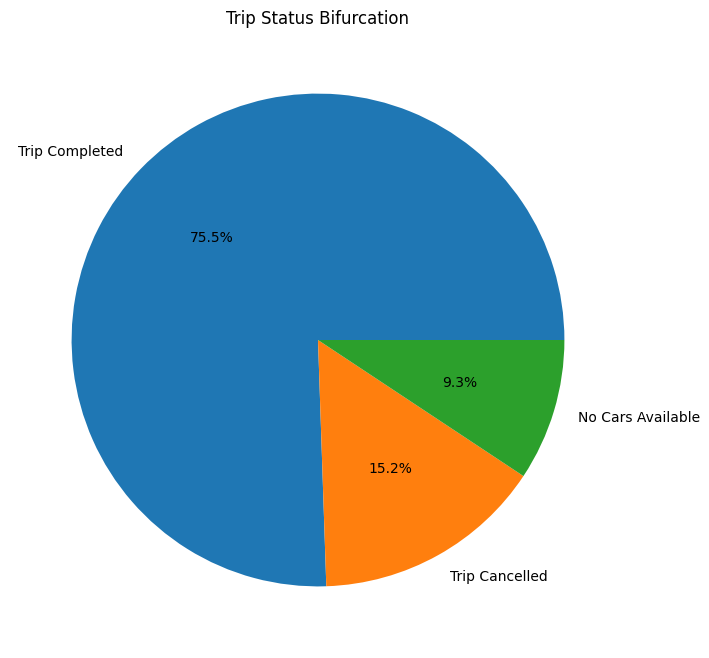

In [34]:
# Plotting a pie chart for Trip Status
plt.figure(figsize=(8, 8))
plt.pie(trip_status_rates , labels = trip_status_rates.index, autopct = '%1.1f%%')

plt.title("Trip Status Bifurcation")
plt.show()

Cancellation Trends (Driver vs Passenger):
cancellation_reason
Driver    1022
Name: count, dtype: int64


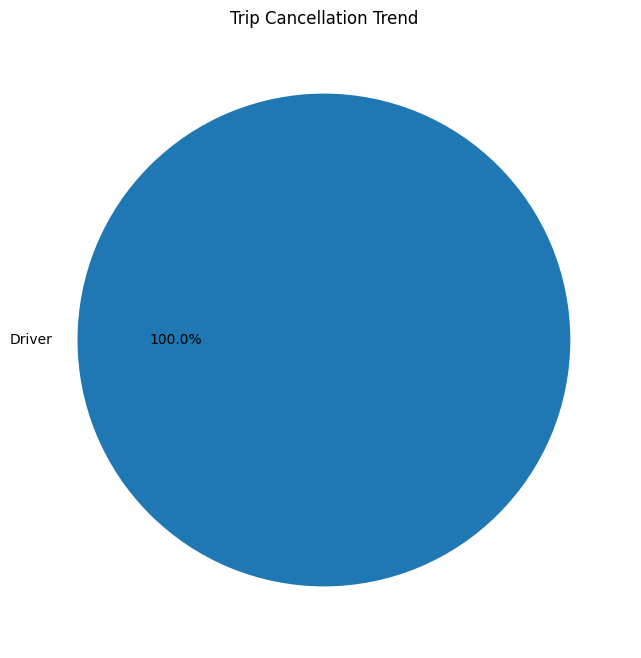

In [35]:
# Calculated the cancellation trends based on the 'cancellation_reason' column & plot the same
cancellation_trends = new_df[new_df['trip_status'] == 'Trip Cancelled']['cancellation_reason'].value_counts()

# Print the cancellation trends
print(f"Cancellation Trends (Driver vs Passenger):")
print(cancellation_trends)

plt.figure(figsize=(8, 8))
plt.pie(cancellation_trends , labels = cancellation_trends.index, autopct = '%1.1f%%')

plt.title("Trip Cancellation Trend")
plt.show()

# Looking deeper into not completed trips

In [36]:
df.columns

Index(['request_id', 'pickup_point', 'drop_point', 'request_timestamp',
       'start_timestamp', 'drop_timestamp', 'trip_cost', 'extra_tip',
       'driver_id', 'trip_status', 'ride_type', 'payment_method', 'weather',
       'trip_duration_minutes', 'total_cost', 'request_date', 'start_date',
       'drop_date', 'request_day', 'start_day', 'drop_day', 'request_time',
       'start_time', 'drop_time', 'request_hour', 'start_hour', 'drop_hour',
       'ride_delay', 'cancellation_reason'],
      dtype='object')

In [37]:
#Creating a New Dataframe for only incomplete rides.
# Verify the columns

incomplete_rides_df = df[df['trip_status'] != 'Trip Completed'][[
    'request_id',
    'pickup_point',
    'drop_point',
    'driver_id',
    'trip_status',
    'payment_method',
    'weather',
    'request_day',
    'request_hour',
    'cancellation_reason'
]]

incomplete_rides_df.columns

Index(['request_id', 'pickup_point', 'drop_point', 'driver_id', 'trip_status',
       'payment_method', 'weather', 'request_day', 'request_hour',
       'cancellation_reason'],
      dtype='object')

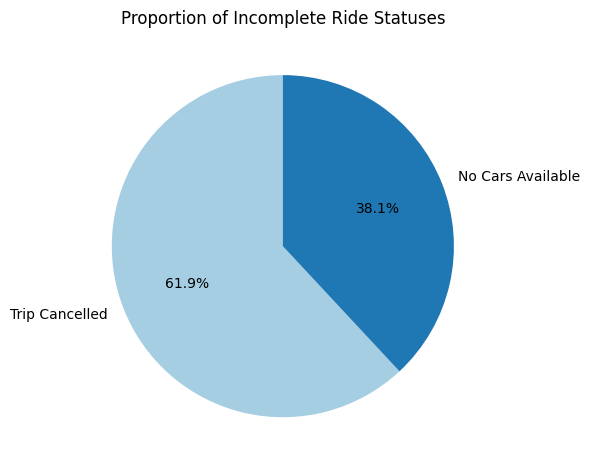

In [38]:
#Proportion of Incomplete Rides’ Trip Statuses
status_counts = incomplete_rides_df['trip_status'].value_counts()
plt.pie(
    status_counts,
    labels=status_counts.index,
    autopct='%1.1f%%',
    colors=plt.cm.Paired.colors,
    startangle=90 )
plt.title("Proportion of Incomplete Ride Statuses")
plt.tight_layout()
plt.show()



In [39]:
incomplete_rides_df["request_day"]

,request_day
0,Tuesday
3,Tuesday
9,Tuesday
14,Tuesday
17,Tuesday
...,...
6717,Tuesday
6724,Tuesday
6726,Tuesday
6730,Tuesday


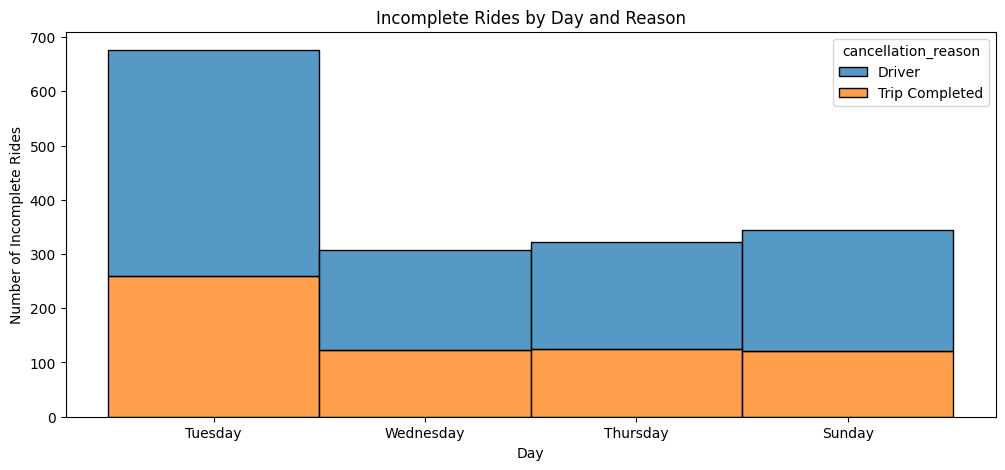

In [40]:
# Which is the day with the most rides cancelled?
# What is the split of cancelled trips' status across days?
plt.figure(figsize=(12, 5))
sns.histplot(
    data=incomplete_rides_df,
    x='request_day',
    hue='cancellation_reason',
    bins=7,
    multiple='stack'
)
plt.title("Incomplete Rides by Day and Reason")
plt.xlabel("Day")
plt.ylabel("Number of Incomplete Rides")
plt.show()



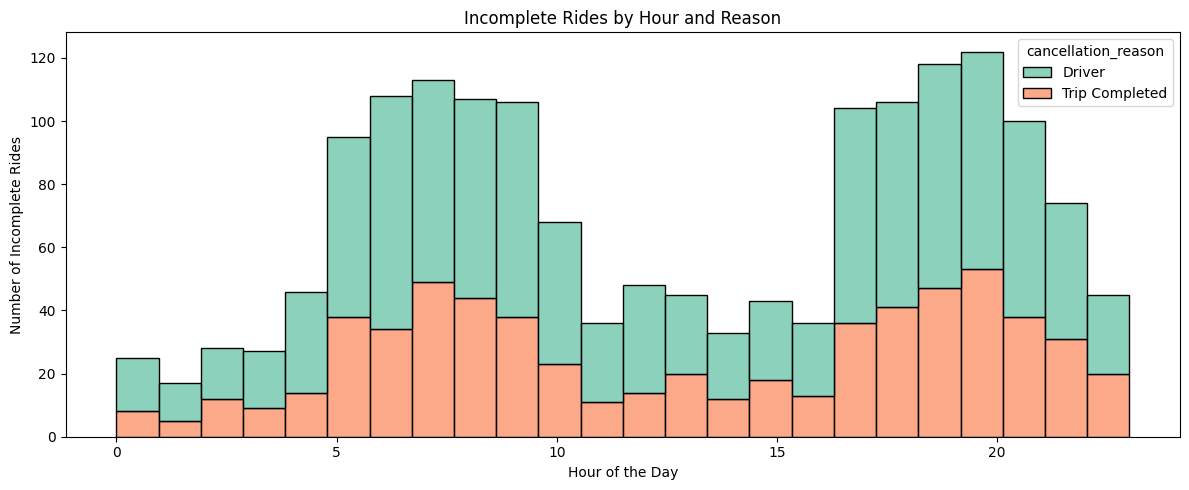

In [41]:
# What are the times of the days with most rides cancelled?
# What are the reasons for the cancellations throughout the day?
plt.figure(figsize=(12, 5))
sns.histplot(
    data=incomplete_rides_df,
    x='request_hour',
    hue='cancellation_reason',
    bins=24,
    multiple='stack',
    palette='Set2'
)
plt.title("Incomplete Rides by Hour and Reason")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Incomplete Rides")
plt.tight_layout()
plt.show()


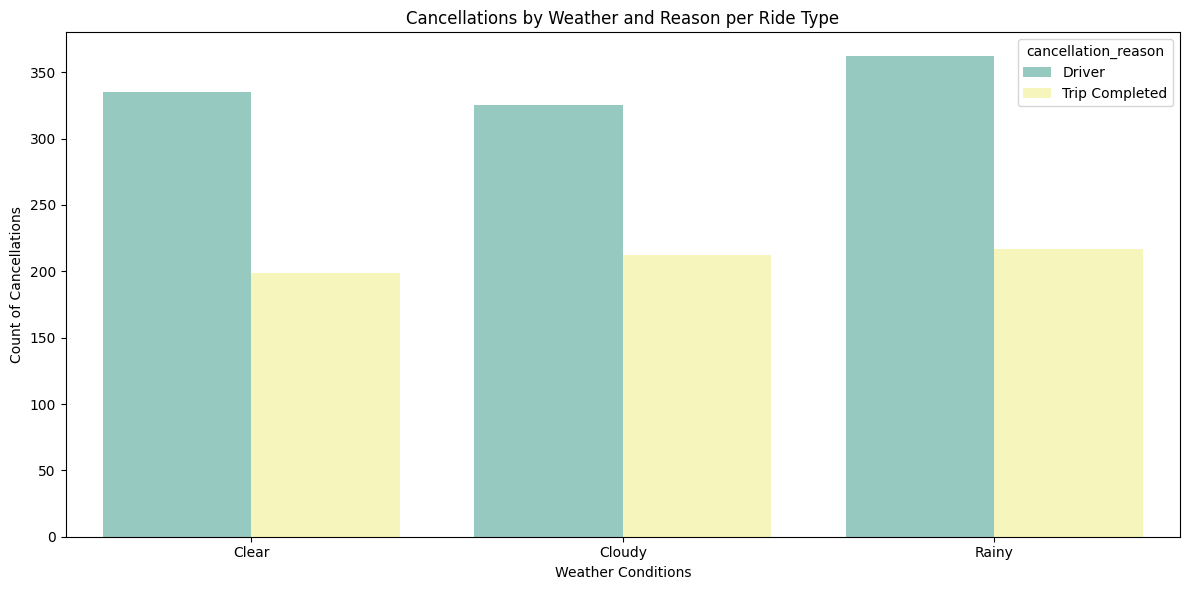

In [42]:
# Relationship Between Weather & Cancellation Reason
weather_cancel_group = incomplete_rides_df.groupby(['weather', 'cancellation_reason']).size().reset_index(name='count')
plt.figure(figsize=(12, 6))
sns.barplot(
    data=weather_cancel_group,
    x='weather',
    y='count',
    hue='cancellation_reason',
    palette='Set3'
)

plt.title('Cancellations by Weather and Reason per Ride Type')
plt.xlabel('Weather Conditions')
plt.ylabel('Count of Cancellations')
plt.tight_layout()
plt.show()